In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
import spectral

In [46]:
x_basis = spectral.Fourier(64) #creates basis, which is just N and interval
domain = spectral.Domain([x_basis]) #just makes the basis... part of it???

In [55]:
x_basis.N

64

In [48]:
f = spectral.Field(domain) #sets domain and datatype and data to all zeros

In [53]:
f.domain

In [7]:
f.require_grid_space()

In [8]:
x_basis.grid()

array([0.        , 0.09817477, 0.19634954, 0.29452431, 0.39269908,
       0.49087385, 0.58904862, 0.68722339, 0.78539816, 0.88357293,
       0.9817477 , 1.07992247, 1.17809725, 1.27627202, 1.37444679,
       1.47262156, 1.57079633, 1.6689711 , 1.76714587, 1.86532064,
       1.96349541, 2.06167018, 2.15984495, 2.25801972, 2.35619449,
       2.45436926, 2.55254403, 2.6507188 , 2.74889357, 2.84706834,
       2.94524311, 3.04341788, 3.14159265, 3.23976742, 3.33794219,
       3.43611696, 3.53429174, 3.63246651, 3.73064128, 3.82881605,
       3.92699082, 4.02516559, 4.12334036, 4.22151513, 4.3196899 ,
       4.41786467, 4.51603944, 4.61421421, 4.71238898, 4.81056375,
       4.90873852, 5.00691329, 5.10508806, 5.20326283, 5.3014376 ,
       5.39961237, 5.49778714, 5.59596191, 5.69413668, 5.79231146,
       5.89048623, 5.988661  , 6.08683577, 6.18501054])

In [9]:
f.domain.bases[0]

In [13]:
f.data 

First let's consider complex transforms.

In [14]:
f = spectral.Field(domain, dtype=np.complex128)
f.data[-1] = 1

In [15]:
f.data

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

We will use `scipy`'s FFT library. The documentation is listed here:

https://docs.scipy.org/doc/scipy/tutorial/fft.html

In [16]:
grid_data = scipy.fft.ifft(f.data)

In [17]:
len(grid_data)

64

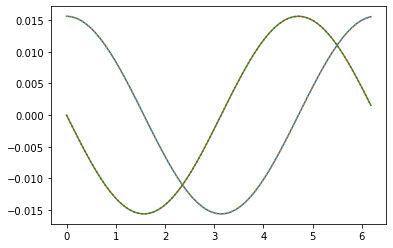

In [18]:
x = x_basis.grid()
plt.plot(x, grid_data.real)
plt.plot(x, np.exp(-1j*x).real/64, linestyle=':')
plt.plot(x, grid_data.imag)
plt.plot(x, np.exp(-1j*x).imag/64, linestyle=':')

What if we want to evaluate the series on twice as many points?

In [23]:
f = spectral.Field(domain, dtype=np.complex128)
f.data[-1] = 1

In [24]:
f.data

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [25]:
scale = 2
coeff_expand = np.zeros(scale*x_basis.N, dtype=np.complex128)

In [26]:
coeff_expand[-1] = f.data[-1]
print(coeff_expand)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [27]:
grid_expand = scipy.fft.ifft(coeff_expand)

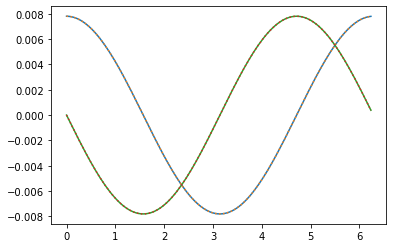

In [28]:
x = x_basis.grid(scale=2)
plt.plot(x, grid_expand.real)
plt.plot(x, np.exp(-1j*x).real/128, linestyle=':')
plt.plot(x, grid_expand.imag)
plt.plot(x, np.exp(-1j*x).imag/128, linestyle=':')

In [29]:
len(x)

128

How about real transform?

In [60]:
x_basis = spectral.Fourier(64)
domain = spectral.Domain([x_basis])
f = spectral.Field(domain)
f.require_grid_space()

In [61]:
x = x_basis.grid()
f.data = np.cos(x)

In [62]:
coeffs = scipy.fft.rfft(f.data)

In [63]:
len(f.data)

64

In [64]:
coeffs

array([-3.07843348e-15+0.00000000e+00j,  3.20000000e+01-3.13150922e-15j,
        4.17524237e-16+5.96887777e-16j, -6.44812792e-16+2.18617780e-16j,
        6.80942720e-16-9.99212849e-16j,  7.34768772e-17+1.74248309e-16j,
        9.48581531e-16+1.96638075e-16j,  5.35688262e-16+6.85838416e-16j,
        4.52759227e-18+6.32848650e-16j,  9.38581024e-16+5.39918503e-16j,
       -3.31473011e-16-3.85435384e-16j,  1.20489257e-15-4.05346260e-16j,
        4.00473117e-16+6.97104572e-16j, -8.46821856e-16-3.34119783e-17j,
        4.47675833e-16-1.44456276e-15j,  6.66133815e-16+2.44929360e-16j,
       -2.33486982e-16+1.81799020e-15j, -6.66133815e-16-2.44929360e-16j,
       -3.09979810e-16-5.52283198e-16j, -8.24480191e-16-2.95208465e-16j,
       -2.01313267e-16-7.65233776e-16j,  5.58302434e-16-2.96704695e-16j,
        3.30114273e-17-1.43780097e-16j,  1.23919978e-15+1.01887555e-15j,
        4.16676863e-16+2.40920549e-15j, -2.71346906e-15+1.07325644e-15j,
        1.53757264e-16-1.44581759e-15j,  8.27863383

In [65]:
coeff_data = np.zeros(x_basis.N)

In [66]:
coeff_data[::2] = coeffs.real[:32]
coeff_data[1::2] = coeffs.imag[:32]

In [67]:
coeff_data

array([-3.07843348e-15,  0.00000000e+00,  3.20000000e+01, -3.13150922e-15,
        4.17524237e-16,  5.96887777e-16, -6.44812792e-16,  2.18617780e-16,
        6.80942720e-16, -9.99212849e-16,  7.34768772e-17,  1.74248309e-16,
        9.48581531e-16,  1.96638075e-16,  5.35688262e-16,  6.85838416e-16,
        4.52759227e-18,  6.32848650e-16,  9.38581024e-16,  5.39918503e-16,
       -3.31473011e-16, -3.85435384e-16,  1.20489257e-15, -4.05346260e-16,
        4.00473117e-16,  6.97104572e-16, -8.46821856e-16, -3.34119783e-17,
        4.47675833e-16, -1.44456276e-15,  6.66133815e-16,  2.44929360e-16,
       -2.33486982e-16,  1.81799020e-15, -6.66133815e-16, -2.44929360e-16,
       -3.09979810e-16, -5.52283198e-16, -8.24480191e-16, -2.95208465e-16,
       -2.01313267e-16, -7.65233776e-16,  5.58302434e-16, -2.96704695e-16,
        3.30114273e-17, -1.43780097e-16,  1.23919978e-15,  1.01887555e-15,
        4.16676863e-16,  2.40920549e-15, -2.71346906e-15,  1.07325644e-15,
        1.53757264e-16, -

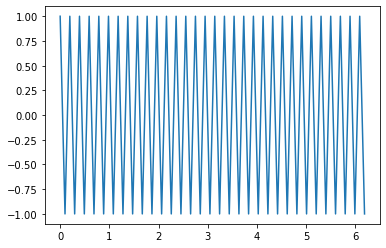

In [68]:
plt.plot(x, np.cos(32*x))

How about the transform to grid space?

In [69]:
f.require_coeff_space()
f.data = np.zeros(x_basis.N)
f.data[4] = 1

In [70]:
len(f.data)

64

In [95]:
complex_data = np.zeros(x_basis.N//2+1, dtype=np.complex128)
complex_data[:32].real = f.data[::2]
complex_data[:32].imag = f.data[1::2]

In [96]:
grid_data = scipy.fft.irfft(complex_data)

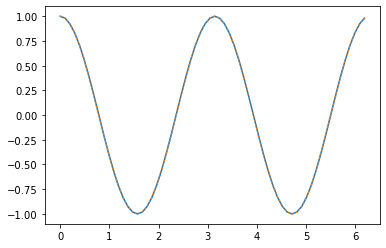

In [101]:
x = x_basis.grid()
plt.plot(x, grid_data*32)
plt.plot(x, np.cos(2*x), linestyle=":")